<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/code/xg%2Bshap(0%2CBOD%EC%A0%9C%EA%B1%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/바이너리인코딩.csv',encoding='utf-8',)
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타,처리효율
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,0,0,1,12238,12238,1,0,0,0,98.3
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,0,0,1,16172,16172,1,0,1,0,95.9
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,0,0,1,12238,12359,1,0,0,0,97.0
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,0,0,1,12076,12076,1,0,0,1,96.6
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,0,1,0,5479,5478,0,1,0,0,97.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,0,1,1,5847,5847,1,1,1,1,88.1
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,0,1,1,5524,5524,1,1,1,1,95.8
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,0,1,1,6095,6095,1,1,1,1,93.7
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,0,1,1,7988,7988,1,1,1,1,95.4


In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_train.csv", encoding = 'utf-8-sig')
X_test_low =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_low(기존모델에test).csv", encoding = 'utf-8-sig')
X_test_high =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_high(기존모델에test).csv", encoding = 'utf-8-sig')
Y_train= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_train.csv", encoding = 'utf-8-sig')
Y_test_low= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_low(기존모델에test).csv", encoding = 'utf-8-sig')
Y_test_high= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_high(기존모델에test).csv", encoding = 'utf-8-sig')

In [ ]:
df = data.copy()

In [ ]:
X = df.drop(['처리효율','방류 BOD','유입 BOD'],axis = 1)

In [ ]:
X

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 COD,...,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,60.0,...,1,0,0,1,12238,12238,1,0,0,0
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,78.6,...,1,0,0,1,16172,16172,1,0,1,0
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,66.9,...,1,0,0,1,12238,12359,1,0,0,0
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,60.8,...,1,0,0,1,12076,12076,1,0,0,1
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,60.5,...,0,0,1,0,5479,5478,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,29.6,...,1,0,1,1,5847,5847,1,1,1,1
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,68.2,...,1,0,1,1,5524,5524,1,1,1,1
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,60.8,...,1,0,1,1,6095,6095,1,1,1,1
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,133.8,...,1,0,1,1,7988,7988,1,1,1,1


In [ ]:
Y = df['처리효율']
Y

0       98.3
1       95.9
2       97.0
3       96.6
4       97.2
        ... 
4275    88.1
4276    95.8
4277    93.7
4278    95.4
4279    85.7
Name: 처리효율, Length: 4280, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=123)

In [ ]:

X_train = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/X_train.csv',encoding='utf-8',)
X_test = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/X_test.csv',encoding='utf-8',)
Y_train = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/Y_train.csv',encoding='utf-8',)
Y_test = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/Y_test.csv',encoding='utf-8',)


In [ ]:
#X_train = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_train.csv", encoding = 'utf-8-sig')
X_cv =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_cv.csv", encoding = 'utf-8-sig')
#Y_train= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_train.csv", encoding = 'utf-8-sig')
Y_cv= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_cv.csv", encoding = 'utf-8-sig')
#X_test= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test.csv", encoding = 'utf-8-sig')
#Y_test= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test.csv", encoding = 'utf-8-sig')

In [ ]:
X_train

,가동개시일_day,고도,고도 방류량,고도 유입하수량,목표수질(BOD)_0,목표수질(BOD)_1,목표수질(BOD)_2,방류 COD,방류 SS,방류 T-N,...,재생에너지 이용률,준공일_day,지역구분_0,지역구분_1,지역구분_2,직원총수(명),처리부하량,총 에너지사용량,총 전력사용량,하수처리량당 (CO2)배출량
0,6449,28,17.3,17.3,0,1,1,9.5,6.5,13.268,...,0.0,6449,1,0,1,0,2.2,1.1,4728.0,0.342
1,2324,80,64.3,64.3,0,1,1,5.2,2.9,9.602,...,0.0,2347,1,0,0,0,26.9,0.9,3940.0,0.077
2,4596,34,0.0,0.0,0,0,1,6.8,4.2,12.390,...,0.0,4596,1,0,1,0,0.1,0.0,0.0,0.000
3,7061,50,41.0,41.0,0,1,1,6.6,0.8,13.441,...,0.0,7061,1,0,0,0,2.8,4.3,18617.0,0.569
4,4231,130,86.3,89.6,0,1,1,18.0,6.5,11.897,...,0.0,4231,1,0,0,0,7.9,10.8,47365.0,0.689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,6483,4000,2406.4,3932.5,0,1,1,8.7,3.1,6.589,...,0.0,6496,0,1,0,13,441.7,520.6,2273255.0,1.186
2722,4856,35,22.5,22.5,0,1,1,8.7,3.0,10.234,...,0.0,4856,1,0,1,0,2.7,13.0,56609.0,3.152
2723,4529,65,62.5,62.5,0,1,1,9.4,3.9,8.015,...,0.0,4570,1,0,0,0,11.3,6.3,27546.0,0.553
2724,4017,110,34.4,34.4,0,1,1,17.3,7.0,13.891,...,0.0,4017,1,0,0,0,8.2,7.1,30970.0,1.128


In [ ]:
Y_train

,처리효율
0,96.4
1,99.6
2,98.1
3,96.6
4,93.4
...,...
2721,97.5
2722,97.3
2723,98.5
2724,98.8


# **XGBoost + SHAP**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost
#import shap

In [ ]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# default hyperparameter model
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=1,
                           colsample_bytree=1, max_depth=6)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,Y_train)

2726 26
[04:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6)

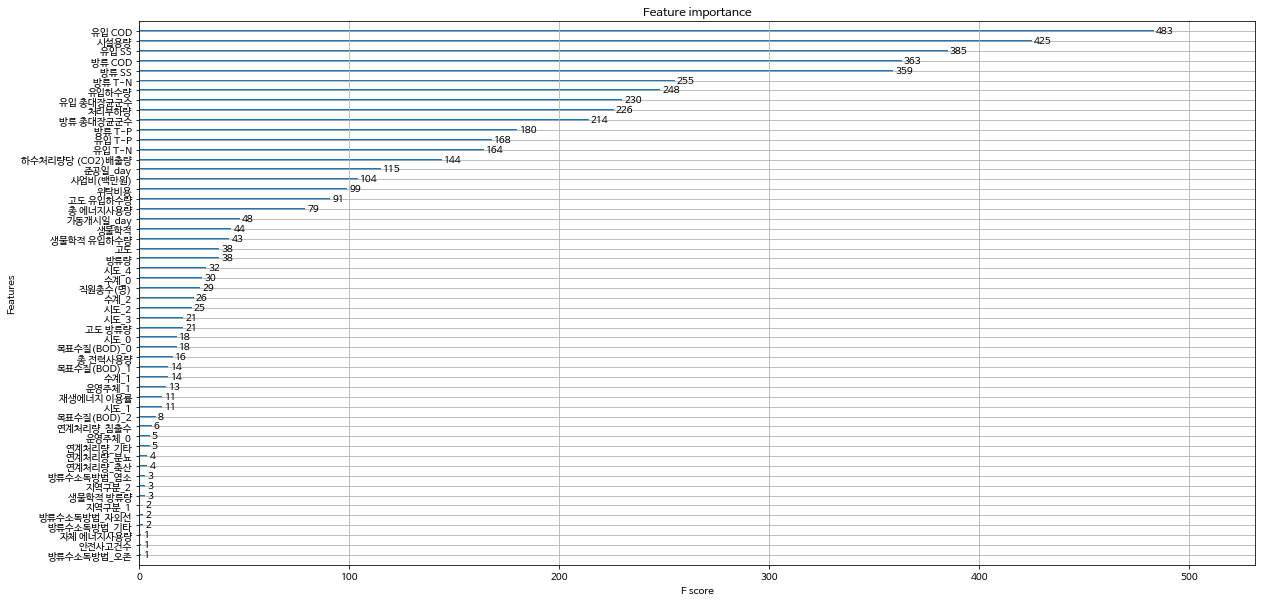

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (20, 10)
#plt.figure(figsize=(50,70))
xgboost.plot_importance(xgb_model)

In [ ]:
from sklearn.metrics import mean_squared_error

# prediction
Y_pred = xgb_model.predict(X_test)

# accuracy check
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 1.95
RMSE: 1.40


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8252786140604897

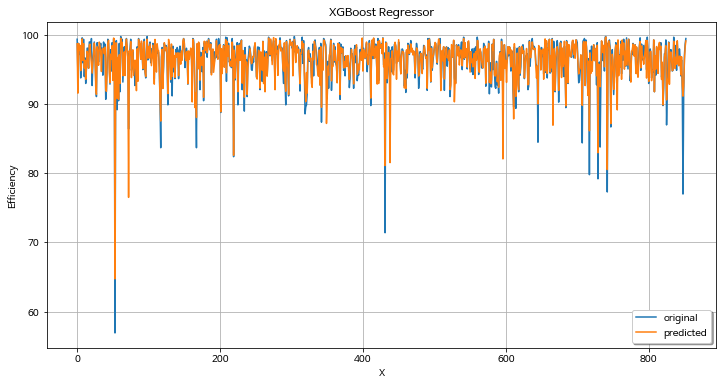

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("XGBoost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
#subsample =0.75 -> 낮추어 overfitting 방지
xgb_model2 = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)

print(len(X_train), len(X_test))
xgb_model2.fit(X_train,Y_train)

3408 853
[08:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6, subsample=0.75)

In [ ]:
from sklearn.metrics import mean_squared_error

# prediction
Y_pred2 = xgb_model2.predict(X_test)

# accuracy check
mse = mean_squared_error(Y_test, Y_pred2)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 1.77
RMSE: 1.33


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred2)

0.8416577341328715

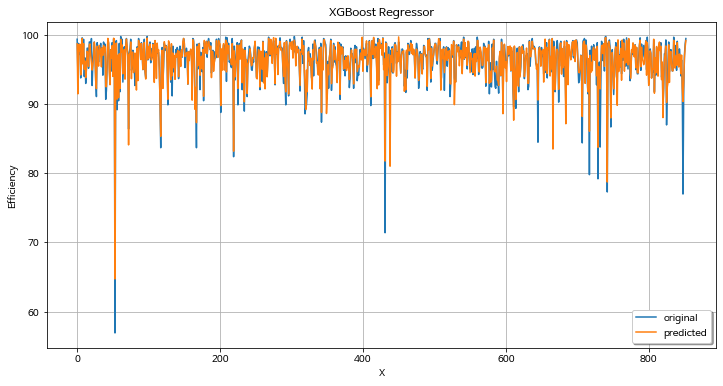

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred2, label="predicted")
plt.title("XGBoost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#하이퍼파라미터

xg_run = xgboost.XGBRegressor()
xgb_param_grid = {'n_estimators':[10,50,100],
              'max_depth': [3,5,7,10], 
              'subsample': [0.6,0.75, 0.8, 1.0],
              'learning_rate':[0.05,0.08,0.1]}

# Create a GridSearchCV object
hr_grid = GridSearchCV(xg_run,
                       param_grid=xgb_param_grid,
                       n_jobs=-1,
                       cv=5)

hr_grid.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:', hr_grid.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(hr_grid.best_score_))

[05:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적 하이퍼 파라미터: {'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.6}
최적 예측 정확도: 0.8305


In [ ]:
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

,mean_test_score,params
0,-264.120461,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
1,-264.138710,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
2,-264.162649,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
3,-264.124749,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
4,-3.753336,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
...,...,...
139,0.771647,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
140,0.821391,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
141,0.826093,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
142,0.827289,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


In [ ]:
xg_run = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.6,
                           colsample_bytree=1, max_depth=10)

print(len(X_train), len(X_test))
xg_run.fit(X_train,Y_train)

2726 853
[05:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=10, subsample=0.6)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# prediction
Y_pred = xg_run.predict(X_test)
r2=r2_score(Y_test, Y_pred)
# accuracy check
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse**(0.5)
print("test MSE: %.4f" % mse)
print("test RMSE: %.4f" % rmse)
print("test R2: %.4f"% r2)

test MSE: 1.3946
test RMSE: 1.1809
test R2: 0.8304


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


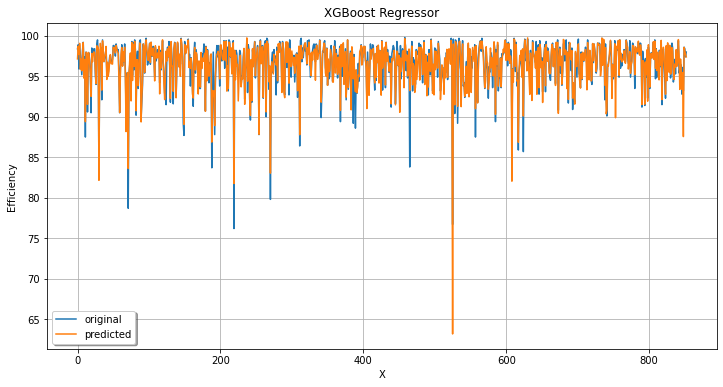

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred, label="predicted")
plt.title("XGBoost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
# validation
valid_predict = xg_run.predict(X_cv)
print("validation RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, Y_cv))) )
print("validation MSE:{}".format(mean_squared_error(valid_predict, Y_cv)))
print('validation R2: {:.4f}\n'.format(r2_score(Y_cv,valid_predict)))

validation RMSE:1.6556074137259802
validation MSE:2.7410359083844287
validation R2: 0.7927



In [ ]:
#subsample =0.75 -> 낮추어 overfitting 방지 , max_depth = 7, learning_rate = 0.08
xgb_model3 = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model3.fit(X_train,Y_train)

2726 853
[05:10:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [ ]:
from sklearn.metrics import mean_squared_error

# prediction
Y_pred3 = xgb_model3.predict(X_test)

# accuracy check
mse = mean_squared_error(Y_test, Y_pred3)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 1.57
RMSE: 1.25


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred3)

0.8096030525872174

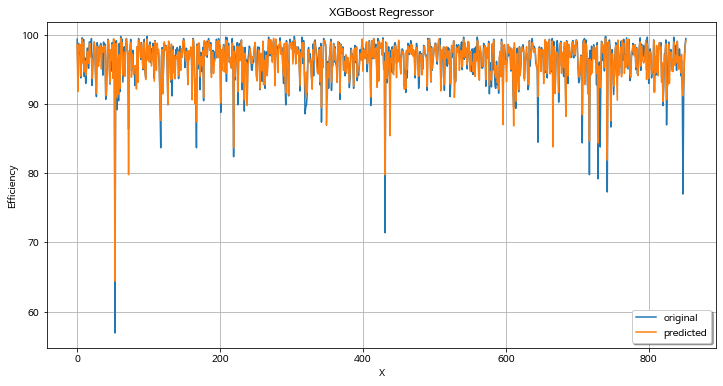

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Y_pred3, label="predicted")
plt.title("XGBoost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
#subsample =0.75 -> 낮추어 overfitting 방지 , max_depth = 7, learning_rate = 0.08
xgb_model3 = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test_low))
xgb_model3.fit(X_train,Y_train)

2726 26
[05:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [ ]:
from sklearn.metrics import mean_squared_error

# prediction
Y_pred3 = xgb_model3.predict(X_test_low)

# accuracy check
mse = mean_squared_error(Y_test_low, Y_pred3)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 22.67
RMSE: 4.76


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test_low, Y_pred3)

-0.3587028339990044

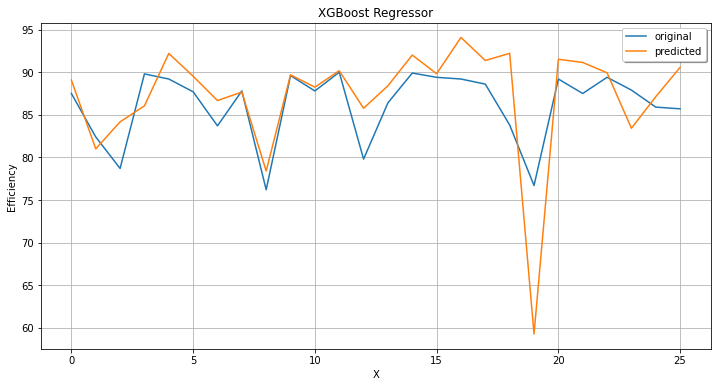

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test_low))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test_low, label="original")
plt.plot(x_ax, Y_pred3, label="predicted")
plt.title("XGBoost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
#subsample =0.75 -> 낮추어 overfitting 방지 , max_depth = 7, learning_rate = 0.08
xgb_model3 = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test_high))
xgb_model3.fit(X_train,Y_train)

2726 827
[04:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [ ]:
from sklearn.metrics import mean_squared_error

# prediction
Y_pred3 = xgb_model3.predict(X_test_high)

# accuracy check
mse = mean_squared_error(Y_test_high, Y_pred3)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 0.90
RMSE: 0.95


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test_high, Y_pred3)

0.7975849440612673

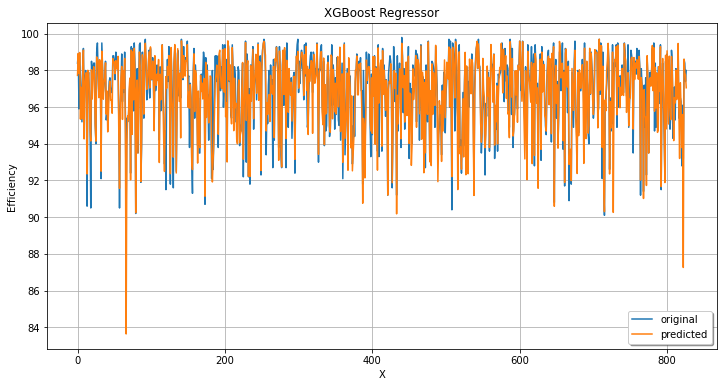

In [ ]:
# visualizing in a plot
x_ax = range(len(Y_test_high))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test_high, label="original")
plt.plot(x_ax, Y_pred3, label="predicted")
plt.title("XGBoost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

shap

[07:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


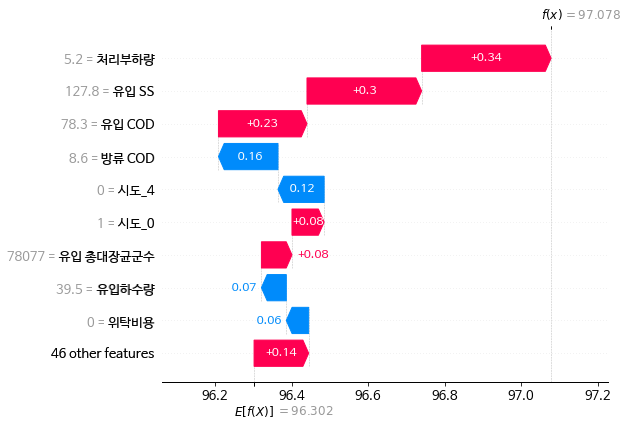

In [ ]:
# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X_train, Y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

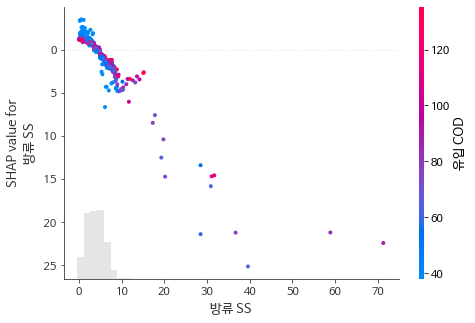

In [ ]:
shap.plots.scatter(shap_values[:,"방류 SS"], color=shap_values)

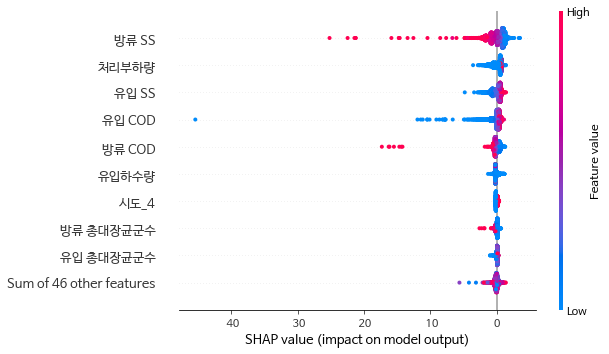

In [ ]:
shap.plots.beeswarm(shap_values)

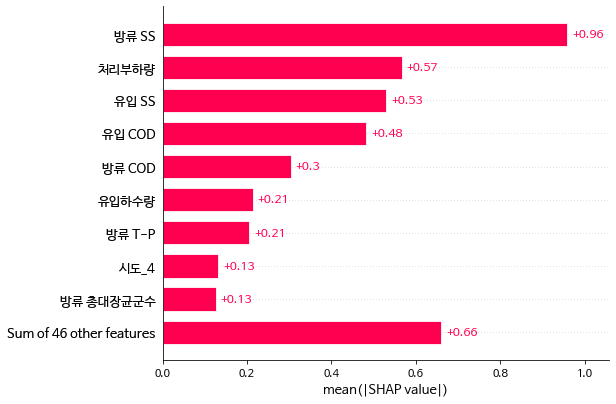

In [ ]:
shap.plots.bar(shap_values)